# Topic Modeling in Python

## 2. Getting started with topic modelling in python

Required libraries:
nltk, gensim, numpy, matplotlib, pandas, and spacy

Download the latest wikipedia corpus from: https://dumps.wikimedia.org/enwiki/latest/ (download the file that contains "enwiki-latest-pages-articles1.xml").

Execute the following command to extract and lemmatize the entire corpus
python -m gensim.scripts.make_wikicorpus data/enwiki-latest-pages-articles1.xml-p10p30302.bz2 data/


In [1]:
import gensim
word_id = gensim.corpora.Dictionary.load_from_text('data/_wordids.txt')
corpus = gensim.corpora.MmCorpus('data/_tfidf.mm')
print(corpus)

MmCorpus(14883 documents, 43273 features, 6747396 non-zero entries)


In [ ]:
#Model definition: corpus= input collection of texts; id2word = dictionary of word ids; 
#num_topics= # topics the model should infer. Check all the model parameters here: https://radimrehurek.com/gensim/models/ldamodel.html
topic_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=word_id,
                                           num_topics=10,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [2]:
#Optimize the number of topics in relation to the similarity measures and select the model with the highest 
#coherence score. Observe how Perplexity score changes at every iteration.
for k in [10, 20, 40, 80, 100, 120]:
    topic_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=word_id,
                                           num_topics=k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    print("Number of topics %d" % k)
    print("Perplexity:  %d" % topic_model.log_perplexity(corpus))
    coherence=gensim.models.CoherenceModel(model=topic_model, corpus=corpus, coherence='u_mass')
    print("Coherence: %d" % coherence.get_coherence())
    

Number of topics 10
Perplexity:  -12
Coherence: -3
Number of topics 20
Perplexity:  -18
Coherence: -2
Number of topics 40
Perplexity:  -28
Coherence: -3
Number of topics 80
Perplexity:  -50
Coherence: -3
Number of topics 100
Perplexity:  -63
Coherence: -3
Number of topics 120
Perplexity:  -79
Coherence: -3


As you can see the optimal number of topics seems to be between 10 and 20. Next, we will explore that range and check the quality of the output by visualizing topics and top words.

In [3]:
coherence_scores = []
for k in range(10, 20):
    topic_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=word_id,
                                           num_topics=k,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    coherence=gensim.models.CoherenceModel(model=topic_model, corpus=corpus, coherence='u_mass')
    coherence_scores.append(coherence.get_coherence())

In [6]:
#Visualize the coherence values by topic
import matplotlib.pyplot as plt

lim=20; start=10; step=1;
x = range(start, lim, step)
plt.plot(x, coherence_scores)
plt.xlabel("Topic #")
plt.ylabel("Coherence score")
plt.legend(("coherence_scores"), loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

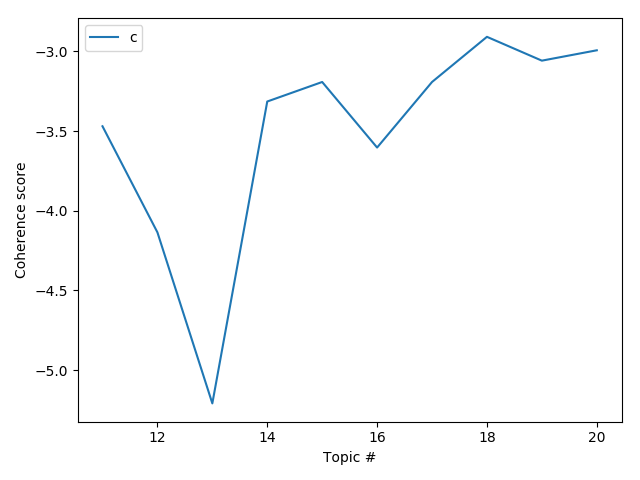

In the image above we can see how the optimal number of topics for this corpus is 18 (coherence score > -3). We now create a visualization of the output from the model with 18 topics, and evaluate the descriptive quality of the top words for each topic.

In [7]:
topic_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=word_id,
                                           num_topics=18,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

We show the top 4 topics and their word frequency

In [ ]:
topics = topic_model.show_topics(formatted=False)



from collections import Counter
import pandas as pd

data_flat = [w for w_list in corpus for w in w_list]

counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in matcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)
plt.show()


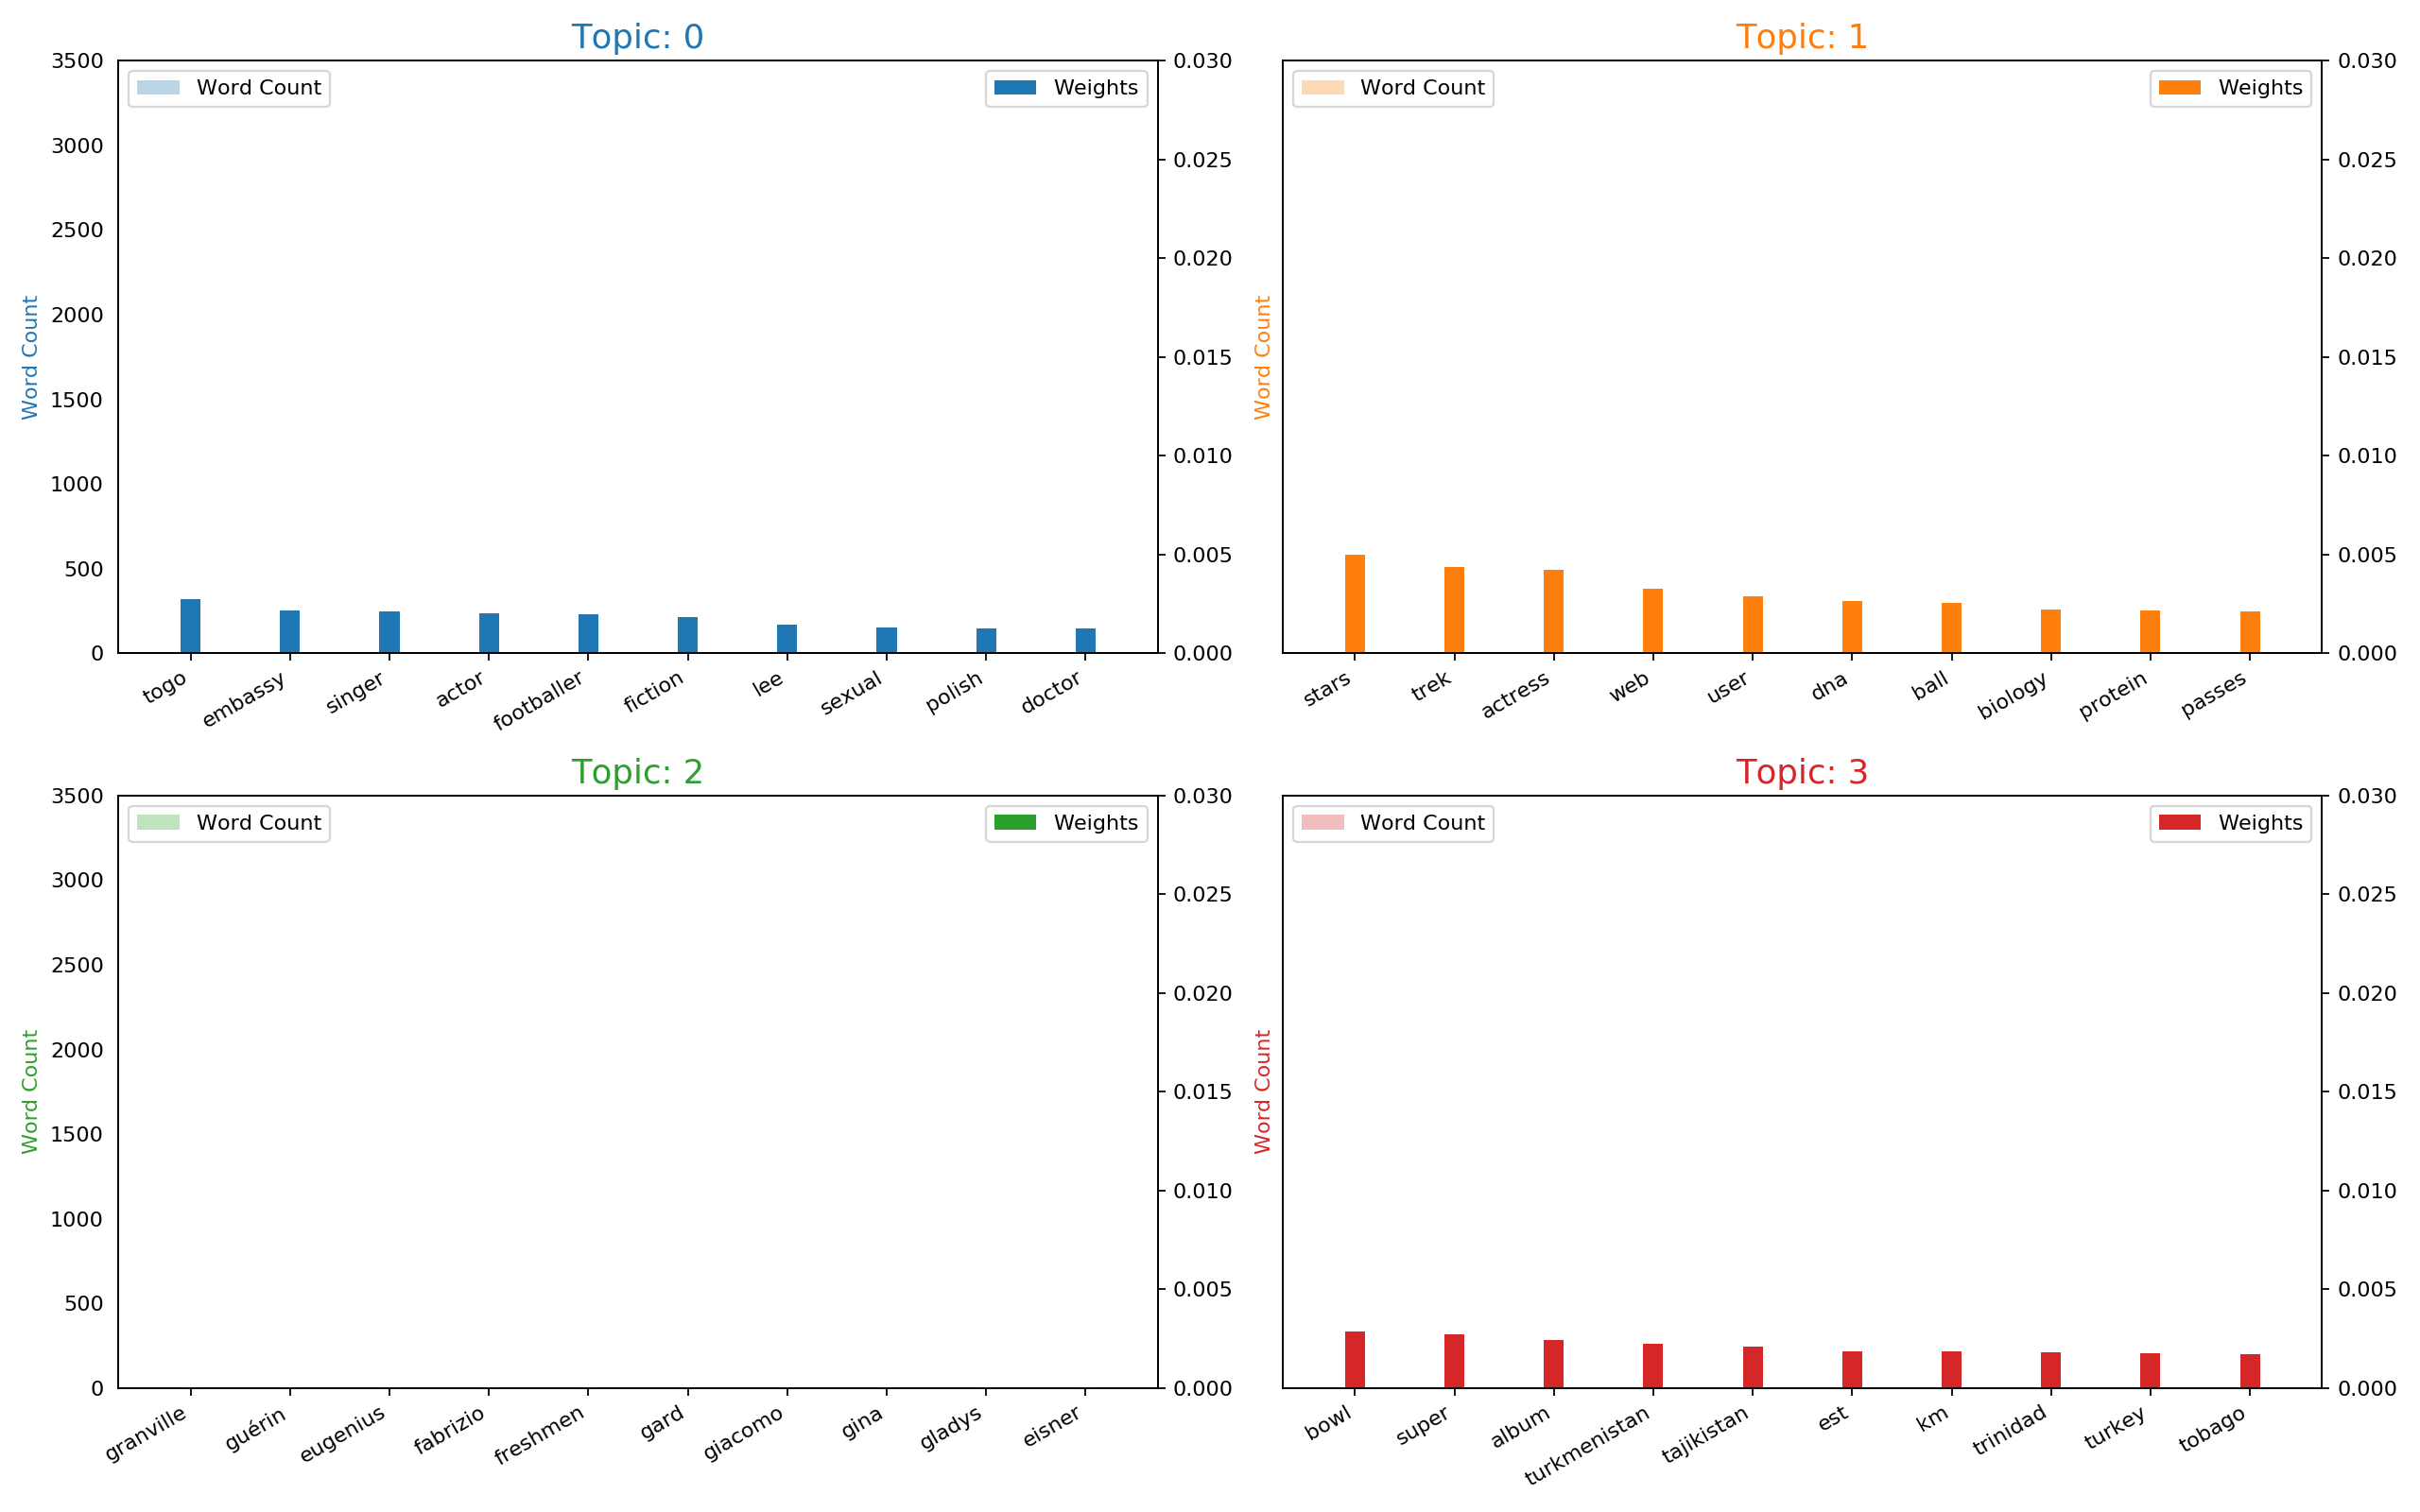

Some questions to think about:

1. What have you noticed about the output of the model that can be improved?
2. Can you infer the main theme for each topic based on their top words?

# Continue to [PTM in Python(part 2)](ptm2.ipynb)